In [58]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [59]:
import h5py
import numpy as np
from astropy.units import deg
from os import path
#from lenstools import GaussianNoiseGenerator, ConvergenceMap
#from scipy.ndimage import gaussian_filter

I want to study the global property of the clone dsets that I made. Specifically, 
* Power spectra
* Peak counts
* General pixel counts

I also want to see if these have any trends with cosmology, esp compared to the original maps. 

Same as the other notebook, but loads up ones that were computed as a batch job. 

In [60]:
orig_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5'
grf_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTrainingGRF_smooth_1.0_noise_0.3.hdf5'
clone_fname = '/scratch/users/swmclau2/clone_maps/UatuFastPMTrainingRobustifyDeepResnetRegAdvWhiteNoise0.0_v3.hdf5'
#clone_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTrainingRobustifyDeepResnetRegAdvGRFNoise1.0.hdf5'

In [61]:
N = 200
all_ys = np.zeros((N, 2))
for boxno in range(N):
    #print(boxno)
    boxname = 'Box%03d'%boxno
    with h5py.File(orig_fname, 'r') as f:
        y = f[boxname]['Y'][0,:]
        
    all_ys[boxno] = y.squeeze()

In [62]:
directory = '/home/users/swmclau2/scratch/clone_maps/'
#pc_arrs = np.load(path.join(directory, 'pc_arrs_white_%d_ms.npy'%smooth), allow_pickle=True)
#pdf_arrs = np.load(path.join(directory, 'pdf_arrs_white_%d_ms.npy'%smooth), allow_pickle=True)

In [63]:
#sorted_y_idxs = np.argsort(all_ys[:,0])
#sorted_y_idxs = np.argsort(all_ys[:,1])

In [64]:
norm_all_ys = (all_ys-np.min(all_ys, axis=0))/(np.max(all_ys,axis=0)-np.min(all_ys,axis=0))

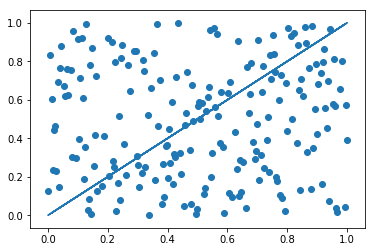

In [65]:
r = 0.5#0.5
slope_vec = np.array([r, 1-r])
slope = slope_vec[1]/slope_vec[0]
plt.scatter(norm_all_ys[:,0], norm_all_ys[:,1])
plt.plot(norm_all_ys[:,0], slope*norm_all_ys[:,0])

In [66]:
projection = np.dot( norm_all_ys, slope_vec)
sorted_y_idxs = np.argsort(projection)

In [67]:
#cmap = sns.cubehelix_palette(N, start=2, rot=0, dark=0.1, light=.95)
cmap = sns.color_palette("magma_r",n_colors=N)#, as_cmap=True)


In [68]:
_nu = np.linspace(-5, 10, 200)
nu = (_nu[1:]+_nu[:-1])/2.0

_l = np.linspace(128, 128**2, 180)
l = (_l[1:]+_l[:-1])/2.0

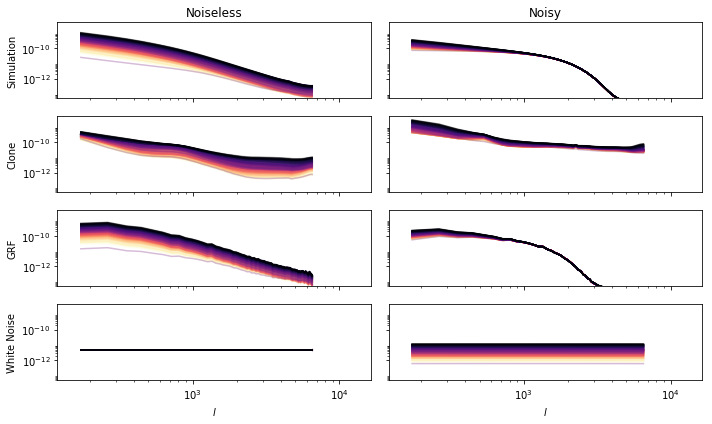

In [69]:
fig, axes = plt.subplots(4,2, figsize = (10,6), sharex=True,sharey=True)
names = ['Noiseless', 'Noisy']
for smooth, (ax,name) in enumerate(zip(axes.T, names)):
    ps_arrs = np.load(path.join(directory, 'ps_arrs_white_%d_ms.npy'%smooth), allow_pickle=True)
    for idx, c in enumerate(cmap):
        cosmo_no = sorted_y_idxs[idx]
        ax[0].plot(l, ps_arrs[0][0][cosmo_no], color = c, alpha = 0.3)
        ax[0].loglog()
        
        ax[1].plot(l, ps_arrs[0][3][cosmo_no], color = c, alpha = 0.3)
        ax[1].loglog()
        
        ax[2].plot(l, ps_arrs[0][1][cosmo_no], color = c, alpha = 0.3)
        ax[2].loglog()
        
        ax[3].plot(l, ps_arrs[0][2][cosmo_no], color = c, alpha = 0.3)
        ax[3].loglog()
        
    ax[0].set_title(name)
    
    ax[3].set_xlabel(r'$l$')
    
ylabels = ['Simulation', 'Clone', 'GRF', 'White Noise']
for ax, label in zip(axes, ylabels):
    ax[0].set_ylabel(label)
    for a in ax:
        a.set_ylim([5e-14, 5e-9])
        a.set_xlim([120, 128**2+1])

        
plt.tight_layout()
fig.savefig('ps_plots.pdf', format='pdf', bbox_inches='tight')

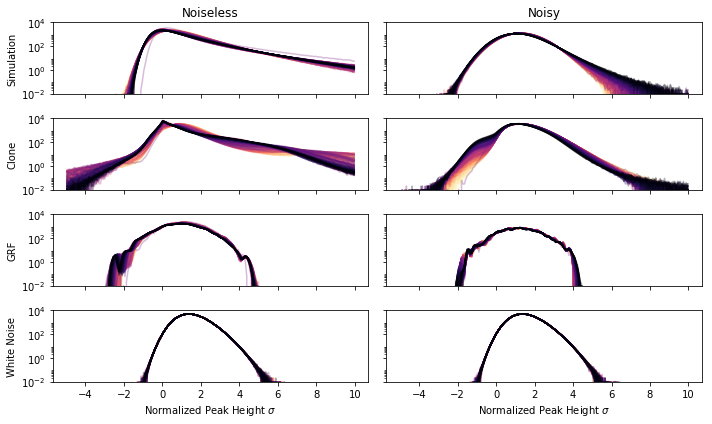

In [70]:
fig, axes = plt.subplots(4,2, figsize = (10,6), sharex=True,sharey=True)
names = ['Noiseless', 'Noisy']
for smooth, (ax,name) in enumerate(zip(axes.T, names)):
    pc_arrs = np.load(path.join(directory, 'pc_arrs_white_%d_ms.npy'%smooth), allow_pickle=True)
    for idx, c in enumerate(cmap):
        cosmo_no = sorted_y_idxs[idx]
        ax[0].plot(nu, pc_arrs[0][0][cosmo_no], color = c, alpha = 0.3)
        ax[0].set_yscale('log')
        
        ax[1].plot(nu, pc_arrs[0][3][cosmo_no], color = c, alpha = 0.3)
        ax[1].set_yscale('log')
        
        ax[2].plot(nu, pc_arrs[0][1][cosmo_no], color = c, alpha = 0.3)
        ax[2].set_yscale('log')
        
        ax[3].plot(nu, pc_arrs[0][2][cosmo_no], color = c, alpha = 0.3)
        ax[3].set_yscale('log')
        
    ax[0].set_title(name)
    
    ax[3].set_xlabel(r'Normalized Peak Height $\sigma$')
    
ylabels = ['Simulation', 'Clone', 'GRF', 'White Noise']
for ax, label in zip(axes, ylabels):
    ax[0].set_ylabel(label)
    for a in ax:
        a.set_ylim([1e-2, 1e4])
        #a.set_xlim([120, 128**2+1])

        
plt.tight_layout()
fig.savefig('pc_plots.pdf', format='pdf', bbox_inches='tight')

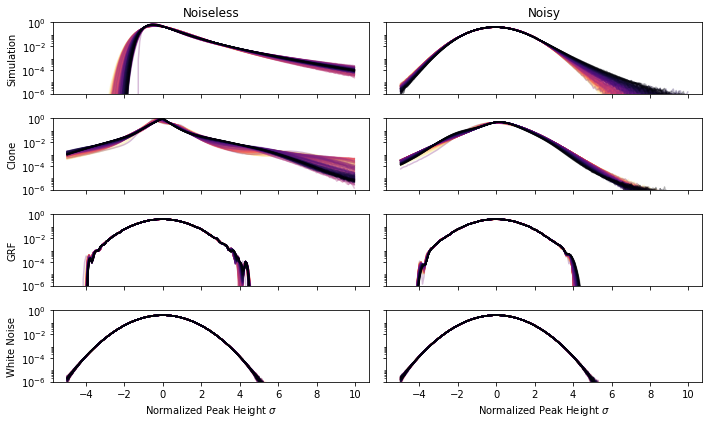

In [71]:
fig, axes = plt.subplots(4,2, figsize = (10,6), sharex=True,sharey=True)
names = ['Noiseless', 'Noisy']
for smooth, (ax,name) in enumerate(zip(axes.T, names)):
    pdf_arrs = np.load(path.join(directory, 'pdf_arrs_white_%d_ms.npy'%smooth), allow_pickle=True)
    for idx, c in enumerate(cmap):
        cosmo_no = sorted_y_idxs[idx]
        ax[0].plot(nu, pdf_arrs[0][0][cosmo_no], color = c, alpha = 0.3)
        ax[0].set_yscale('log')
        
        ax[1].plot(nu, pdf_arrs[0][3][cosmo_no], color = c, alpha = 0.3)
        ax[1].set_yscale('log')
        
        ax[2].plot(nu, pdf_arrs[0][1][cosmo_no], color = c, alpha = 0.3)
        ax[2].set_yscale('log')
        
        ax[3].plot(nu, pdf_arrs[0][2][cosmo_no], color = c, alpha = 0.3)
        ax[3].set_yscale('log')
        
    ax[0].set_title(name)
    
    ax[3].set_xlabel(r'Normalized Peak Height $\sigma$')
    
ylabels = ['Simulation', 'Clone', 'GRF', 'White Noise']
for ax, label in zip(axes, ylabels):
    ax[0].set_ylabel(label)
    for a in ax:
        a.set_ylim([1e-6, 1e0])
        #a.set_xlim([120, 128**2+1])
        
        
plt.tight_layout()
fig.savefig('pdf_plots.pdf', format='pdf', bbox_inches='tight')